In [33]:
import pandas as pd
from pandas import DataFrame as df

In [34]:
dat = pd.read_csv('hour.csv')
dat

,hr,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,no_snow,medium_snow,heavy_snow
0,0,0,0,1,0.2879,0.81,0.0000,16,0,0,1
1,1,0,0,1,0.2727,0.80,0.0000,40,0,0,1
2,2,0,0,1,0.2727,0.80,0.0000,32,0,0,1
3,3,0,0,1,0.2879,0.75,0.0000,13,0,0,1
4,4,0,0,1,0.2879,0.75,0.0000,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
17374,19,0,1,2,0.2576,0.60,0.1642,119,0,1,0
17375,20,0,1,2,0.2576,0.60,0.1642,89,0,1,0
17376,21,0,1,1,0.2576,0.60,0.1642,90,0,1,0
17377,22,0,1,1,0.2727,0.56,0.1343,61,0,1,0


#### Removing target columns and date-day

In [35]:
dat_nodate = dat.drop(['cnt'], axis=1)

### Finding variance in all columns

In [36]:
## Season is redundant given month and same goes for instant and hr
# dat_nodate = dat_nodate.drop(['season', 'instant', 'yr'], axis=1)

In [37]:
vars = dat_nodate.var().sort_values(ascending=False)
vars

hr             47.808998
weathersit      0.408777
no_snow         0.249988
medium_snow     0.222940
workingday      0.216626
heavy_snow      0.133991
hum             0.037222
atemp           0.029532
holiday         0.027944
windspeed       0.014967
dtype: float64

### Finding correlation with target variable

In [38]:
corrs = dat_nodate.apply(lambda x: x.corr(dat.cnt)).abs().sort_values(ascending=False)
corrs

atemp          0.400929
hr             0.394071
hum            0.322911
no_snow        0.240614
heavy_snow     0.206725
weathersit     0.142426
medium_snow    0.094527
windspeed      0.093234
holiday        0.030927
workingday     0.030284
dtype: float64

In [39]:
corrs_sort = corrs.abs().sort_values(ascending=False)
corrs_sort

atemp          0.400929
hr             0.394071
hum            0.322911
no_snow        0.240614
heavy_snow     0.206725
weathersit     0.142426
medium_snow    0.094527
windspeed      0.093234
holiday        0.030927
workingday     0.030284
dtype: float64

#### Get columns that correlate more with the target variable

In [40]:
sel_cols = vars[:]
sel_col_names = sel_cols.keys().tolist()

In [41]:
sel_dat = dat[sel_col_names]
sel_dat

,hr,weathersit,no_snow,medium_snow,workingday,heavy_snow,hum,atemp,holiday,windspeed
0,0,1,0,0,0,1,0.81,0.2879,0,0.0000
1,1,1,0,0,0,1,0.80,0.2727,0,0.0000
2,2,1,0,0,0,1,0.80,0.2727,0,0.0000
3,3,1,0,0,0,1,0.75,0.2879,0,0.0000
4,4,1,0,0,0,1,0.75,0.2879,0,0.0000
...,...,...,...,...,...,...,...,...,...,...
17374,19,2,0,1,1,0,0.60,0.2576,0,0.1642
17375,20,2,0,1,1,0,0.60,0.2576,0,0.1642
17376,21,1,0,1,1,0,0.60,0.2576,0,0.1642
17377,22,1,0,1,1,0,0.56,0.2727,0,0.1343


#### Plotting output with respect to each input

In [42]:
from matplotlib import pyplot as plt


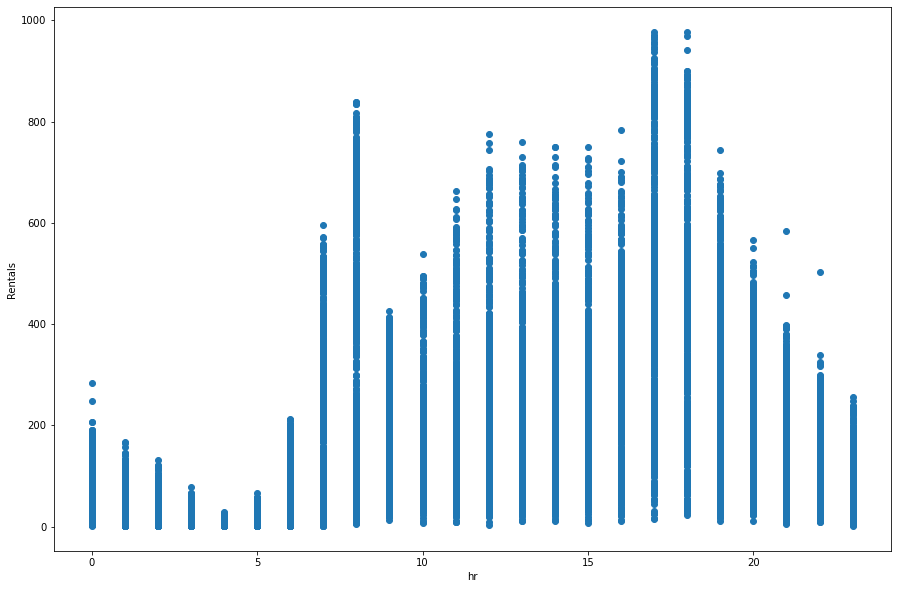

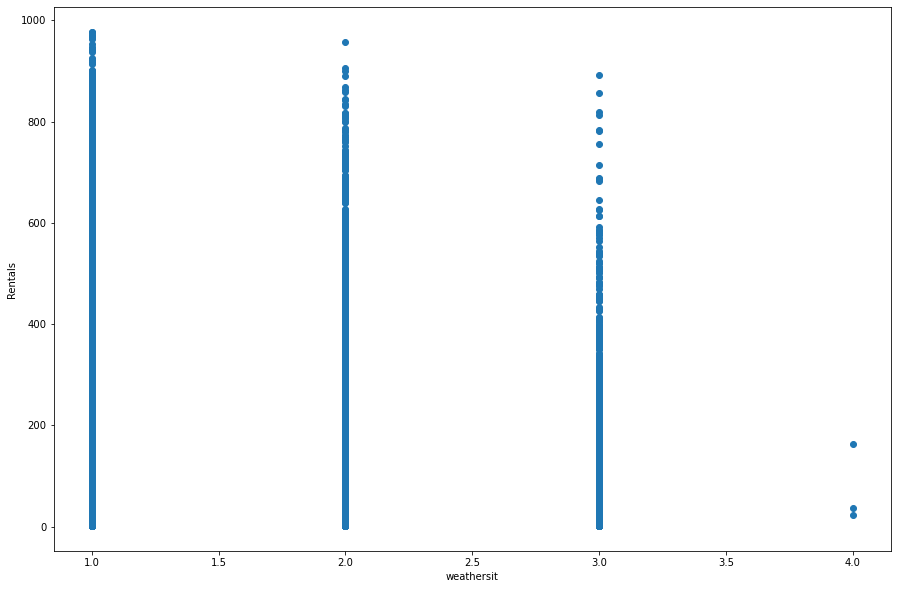

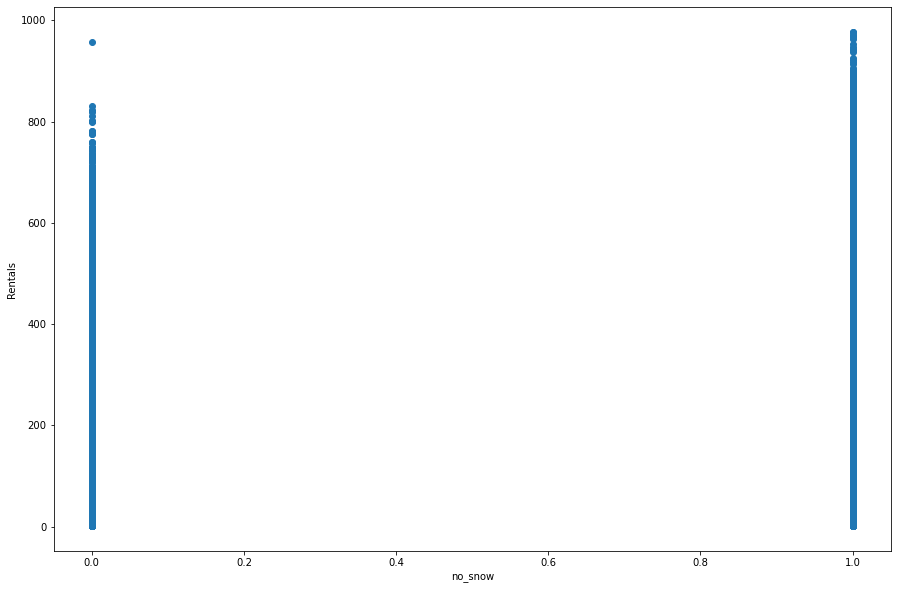

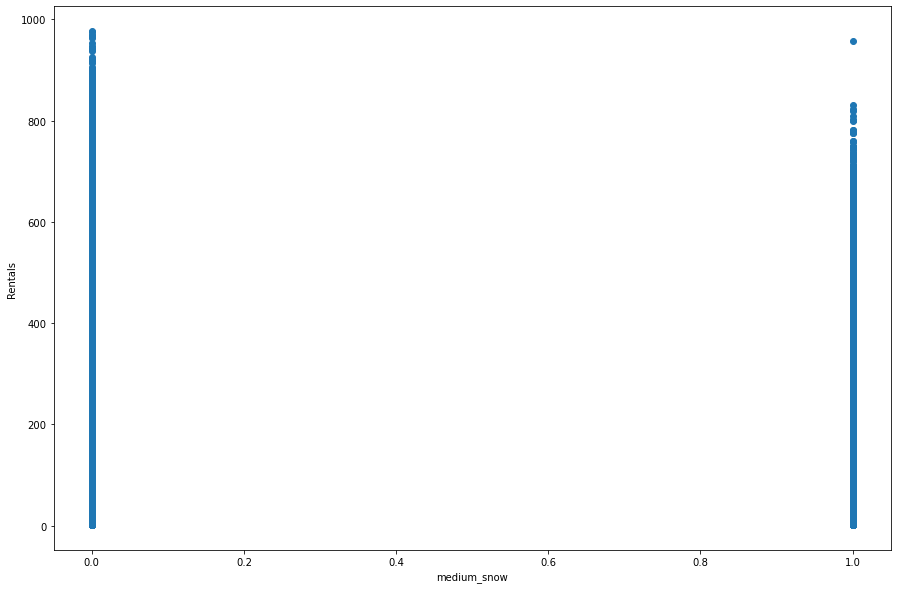

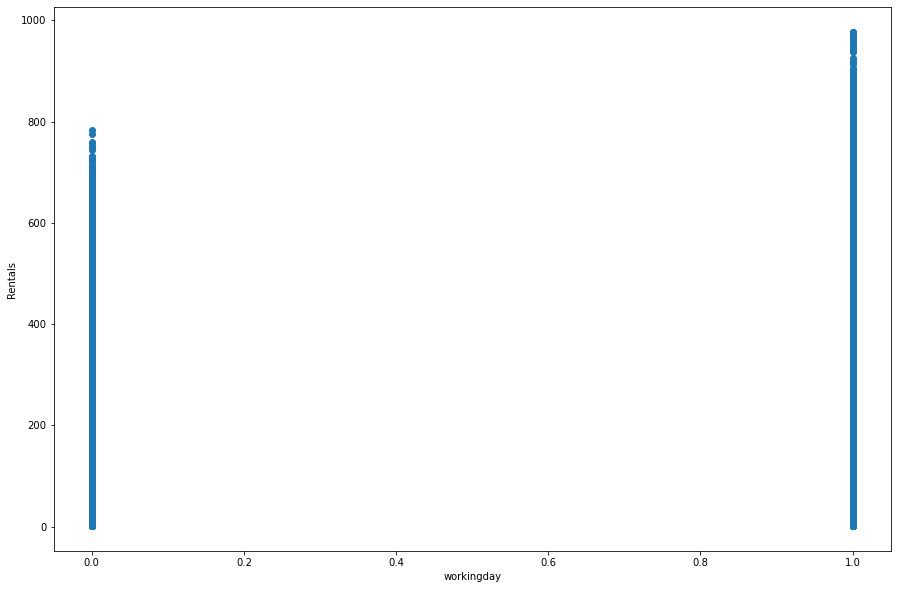

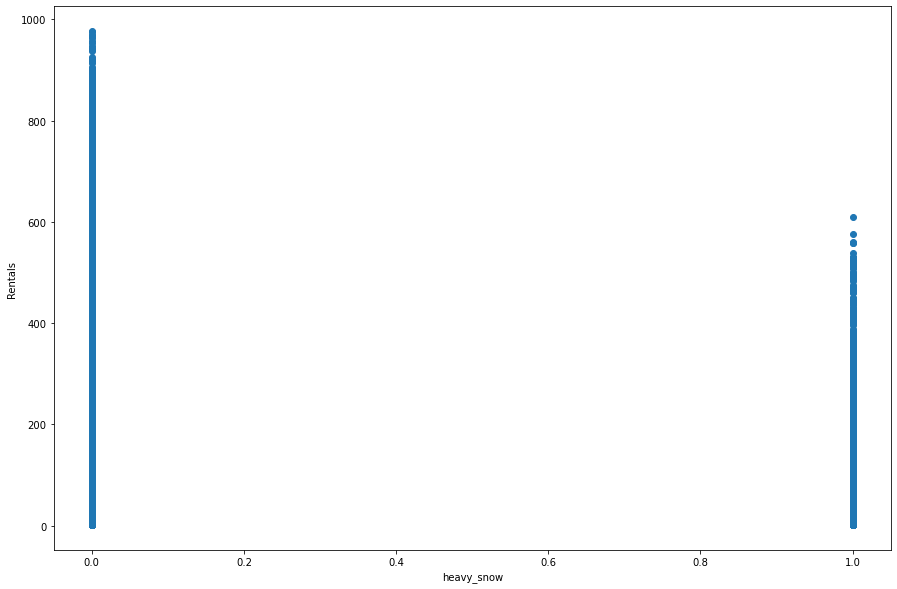

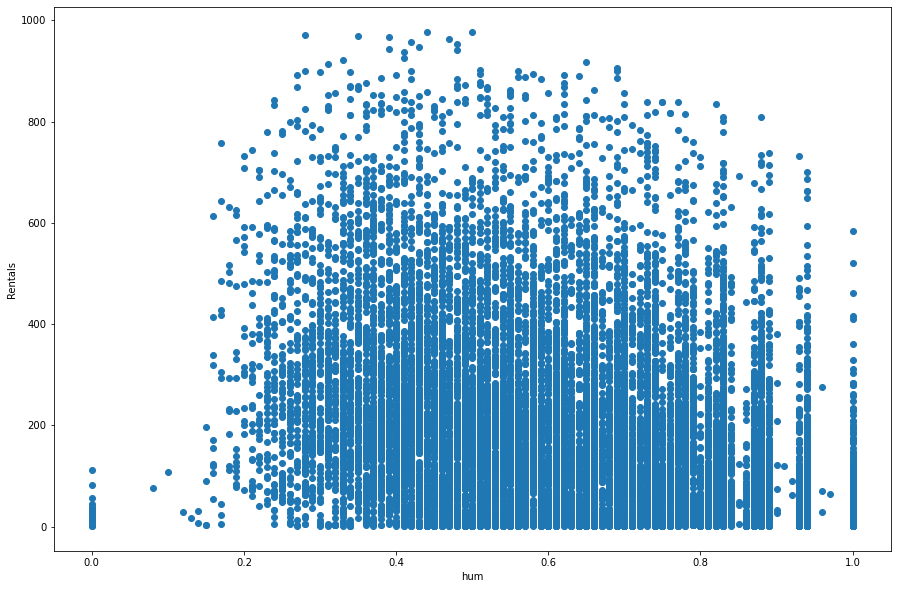

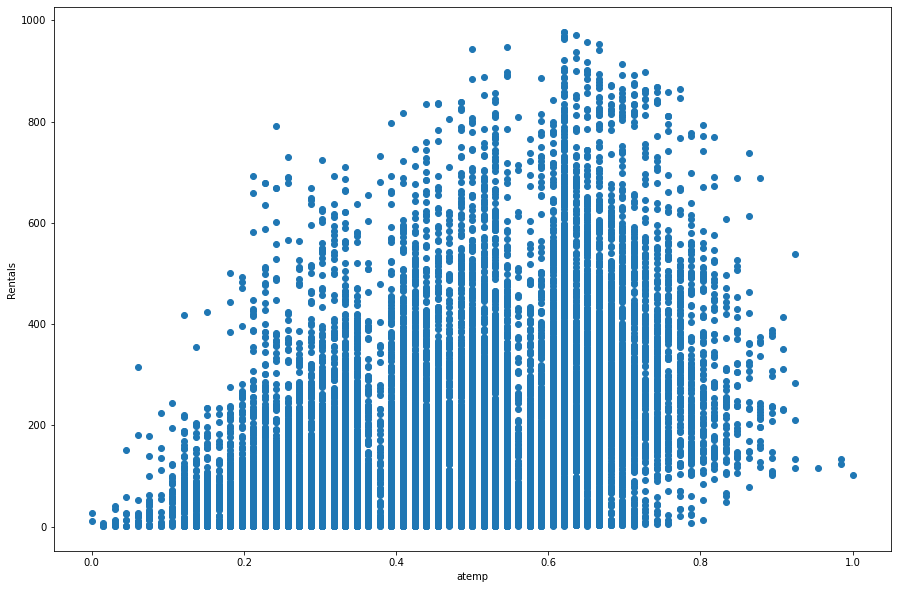

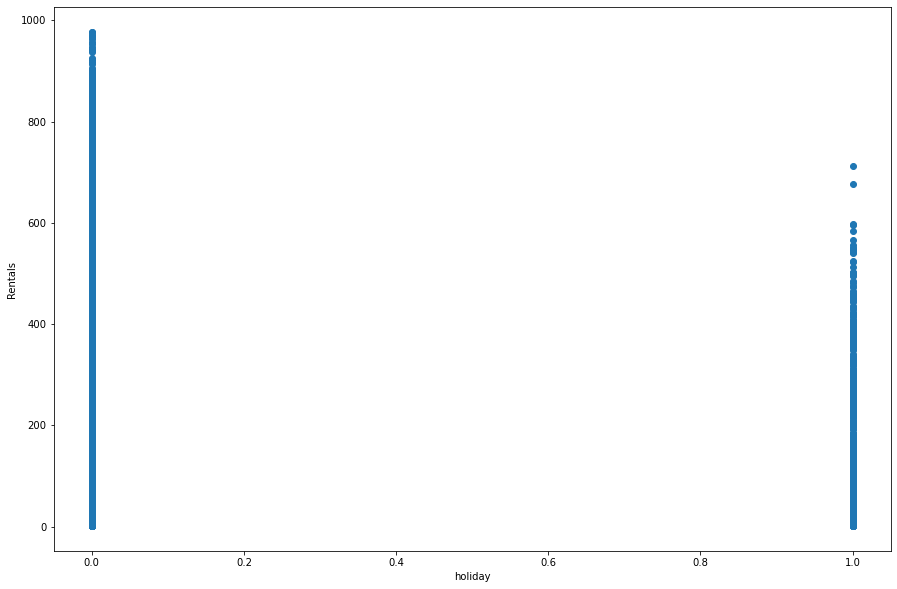

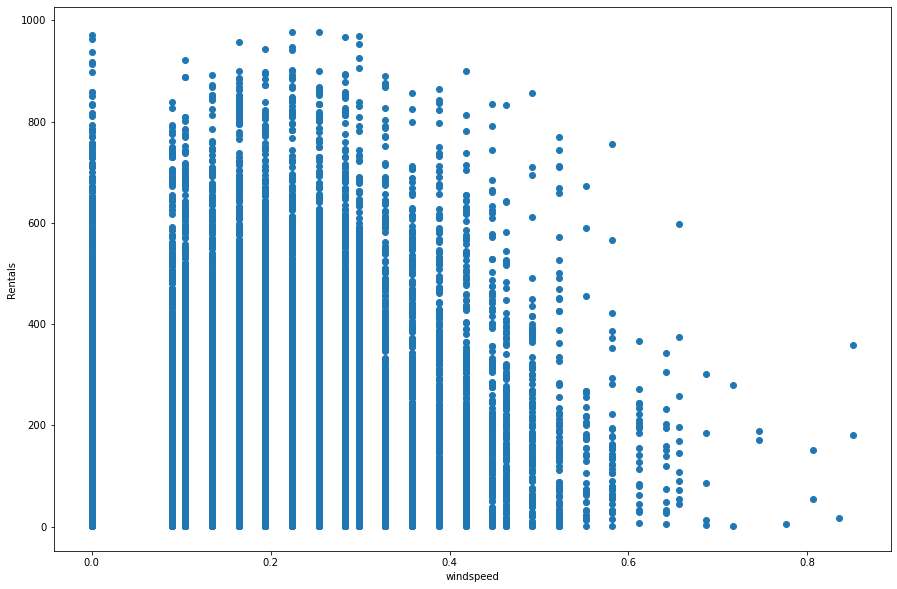

In [43]:
for col in sel_dat:
  plt.figure(figsize=(15,10))
  plt.scatter(sel_dat[col], dat['cnt'])
  plt.xlabel(col)
  plt.ylabel('Rentals')
plt.show()

## Training Polynomial Regression Model

In [44]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
import numpy as np

#### Data Normalization

In [45]:
sel_dat_norm = (sel_dat - sel_dat.mean()) / sel_dat.std()
sel_dat_norm

,hr,weathersit,no_snow,medium_snow,workingday,heavy_snow,hum,atemp,holiday,windspeed
0,-1.669956,-0.665174,-1.010324,-0.710476,-1.466858,2.296455,0.947345,-1.093249,-0.172107,-1.553844
1,-1.525330,-0.665174,-1.010324,-0.710476,-1.466858,2.296455,0.895513,-1.181698,-0.172107,-1.553844
2,-1.380705,-0.665174,-1.010324,-0.710476,-1.466858,2.296455,0.895513,-1.181698,-0.172107,-1.553844
3,-1.236079,-0.665174,-1.010324,-0.710476,-1.466858,2.296455,0.636351,-1.093249,-0.172107,-1.553844
4,-1.091454,-0.665174,-1.010324,-0.710476,-1.466858,2.296455,0.636351,-1.093249,-0.172107,-1.553844
...,...,...,...,...,...,...,...,...,...,...
17374,1.077931,0.898898,-1.010324,1.407426,0.681690,-0.435429,-0.141133,-1.269565,-0.172107,-0.211685
17375,1.222556,0.898898,-1.010324,1.407426,0.681690,-0.435429,-0.141133,-1.269565,-0.172107,-0.211685
17376,1.367182,-0.665174,-1.010324,1.407426,0.681690,-0.435429,-0.141133,-1.269565,-0.172107,-0.211685
17377,1.511807,-0.665174,-1.010324,1.407426,0.681690,-0.435429,-0.348463,-1.181698,-0.172107,-0.456086


In [46]:
comb_dat = sel_dat_norm.copy()
comb_dat['cnt'] = dat['cnt']
comb_dat

,hr,weathersit,no_snow,medium_snow,workingday,heavy_snow,hum,atemp,holiday,windspeed,cnt
0,-1.669956,-0.665174,-1.010324,-0.710476,-1.466858,2.296455,0.947345,-1.093249,-0.172107,-1.553844,16
1,-1.525330,-0.665174,-1.010324,-0.710476,-1.466858,2.296455,0.895513,-1.181698,-0.172107,-1.553844,40
2,-1.380705,-0.665174,-1.010324,-0.710476,-1.466858,2.296455,0.895513,-1.181698,-0.172107,-1.553844,32
3,-1.236079,-0.665174,-1.010324,-0.710476,-1.466858,2.296455,0.636351,-1.093249,-0.172107,-1.553844,13
4,-1.091454,-0.665174,-1.010324,-0.710476,-1.466858,2.296455,0.636351,-1.093249,-0.172107,-1.553844,1
...,...,...,...,...,...,...,...,...,...,...,...
17374,1.077931,0.898898,-1.010324,1.407426,0.681690,-0.435429,-0.141133,-1.269565,-0.172107,-0.211685,119
17375,1.222556,0.898898,-1.010324,1.407426,0.681690,-0.435429,-0.141133,-1.269565,-0.172107,-0.211685,89
17376,1.367182,-0.665174,-1.010324,1.407426,0.681690,-0.435429,-0.141133,-1.269565,-0.172107,-0.211685,90
17377,1.511807,-0.665174,-1.010324,1.407426,0.681690,-0.435429,-0.348463,-1.181698,-0.172107,-0.456086,61


In [47]:
train_dat, test_dat = train_test_split(comb_dat, test_size=0.2)

#### Removing Outliers From Train Data

In [48]:
from scipy import stats
train_dat = train_dat[(np.abs(stats.zscore(train_dat)) < 3).all(axis=1)]

#### Fitting the data

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=5)  # Fitting 5th degree polynomial on input features
poly_variables = poly.fit_transform(train_dat.iloc[:, :-1].values)

# poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, train_dat['cnt'].values, test_size = 0.2, random_state = 42)
n_train = round(len(poly_variables)*0.8)
poly_var_train, poly_var_test, res_train, res_test = poly_variables[:n_train], poly_variables[n_train:], train_dat['cnt'].values[:n_train], train_dat['cnt'].values[n_train:]

regression = linear_model.LinearRegression()  # Linear Regression with the fitted polynomial

model = regression.fit(poly_var_train, res_train)
score = model.score(poly_var_test, res_test)
print("score : ", score)

score :  0.6128186624480546


In [55]:
score

0.6128186624480546

### Inference on Test Data

In [56]:
preds = model.predict(poly_var_test)
preds = np.around(preds).astype(np.int32).tolist()  # rounding off to integer values since bike rentals can only be integers
gt = res_test

##### Plotting first 100 values

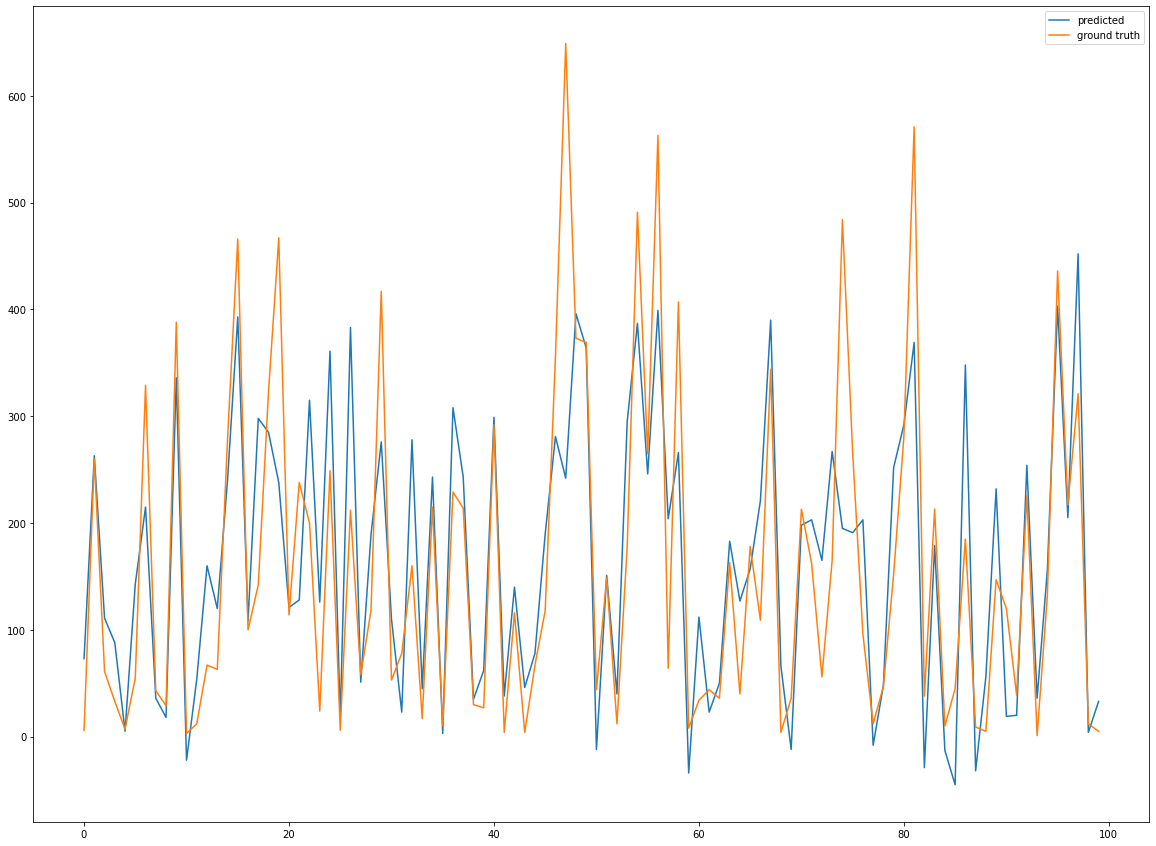

In [57]:
plt.figure(figsize=(20, 15))
plt.plot(range(100), preds[:100], label='predicted')
plt.plot(range(100), gt[:100], label='ground truth')
plt.legend()
plt.show()